In [1]:
# Import pandas library for data manipulation
import pandas as pd

# Function to load a CSV file and display the first 5 rows
def load_csv(file_path):
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Print information about the DataFrame
        print(f"Dataset shape: {df.shape} (rows, columns)")
        print("\nColumn names:")
        print(df.columns.tolist())
        
        # Display the first 5 rows
        print("\nFirst 5 rows of the dataset:")
        print(df.head())
        
        return df
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: '{file_path}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse '{file_path}'. Please check if it's a valid CSV file.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

# Example usage
# Replace 'your_file.csv' with the path to your CSV file
# df = load_csv('your_file.csv')

# If you're using this in a Jupyter notebook or interactive Python shell
# Just call the function with your file path:
# load_csv('path/to/your/file.csv')

In [2]:
# Task 2: Check for Missing Values
# Description: Identify and list the columns with missing values and the number of missing values in each.
import pandas as pd

# Sample DataFrame with missing values
data = {
    'age': [25, 30, None, 40, 50],
    'salary': [50000, 60000, 70000, None, 80000],
    'department': ['HR', 'Finance', 'IT', 'IT', None]
}

df = pd.DataFrame(data)

# Check for missing values and count per column
missing_values = df.isnull().sum()

# Filter columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Output the columns with missing values and the count of missing values
print("Columns with missing values:")
print(missing_columns)



Columns with missing values:
age           1
salary        1
department    1
dtype: int64


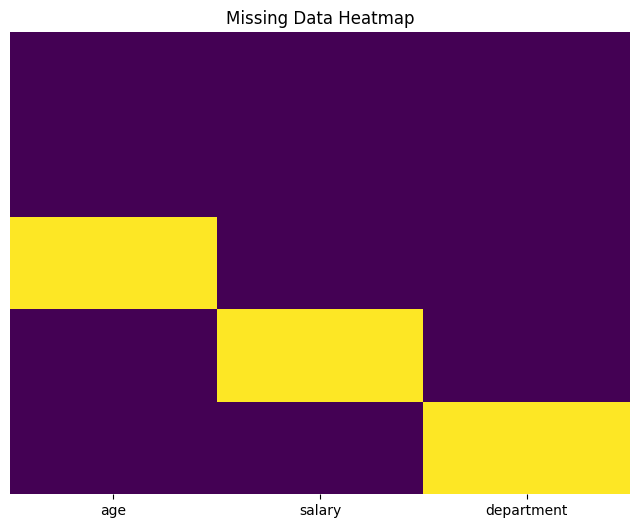

In [3]:
# Task 3: Visualize Missing Data
# Description: Use a heatmap to visualize the missing values in the dataset.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame with missing values
data = {
    'age': [25, 30, None, 40, 50],
    'salary': [50000, 60000, 70000, None, 80000],
    'department': ['HR', 'Finance', 'IT', 'IT', None]
}

df = pd.DataFrame(data)

# Create a heatmap to visualize missing data
plt.figure(figsize=(8, 6))  # Set the size of the figure
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False, xticklabels=df.columns)

# Set the title of the plot
plt.title("Missing Data Heatmap")

# Show the plot
plt.show()




In [4]:
# Task 4: Remove Columns with Many Missing Values
# Description: Drop columns that have more than 50% missing values.

import pandas as pd

# Sample DataFrame with missing values
data = {
    'age': [25, 30, None, 40, 50],
    'salary': [50000, 60000, 70000, None, 80000],
    'department': ['HR', 'Finance', 'IT', 'IT', None],
    'location': [None, None, None, None, None]  # Column with 100% missing values
}

df = pd.DataFrame(data)

# Calculate the threshold for 50% missing values
threshold = len(df) * 0.5

# Drop columns with more than 50% missing values
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Display the cleaned DataFrame
print("Cleaned DataFrame:\n", df_cleaned)



Cleaned DataFrame:
     age   salary department
0  25.0  50000.0         HR
1  30.0  60000.0    Finance
2   NaN  70000.0         IT
3  40.0      NaN         IT
4  50.0  80000.0       None


In [5]:
# Task 5: Identify Duplicate Rows
# Description: Check for and display any duplicate rows in the dataset.

import pandas as pd

# Sample DataFrame with duplicate rows
data = {
    'age': [25, 30, 25, 40, 50, 30],
    'salary': [50000, 60000, 50000, 70000, 80000, 60000],
    'department': ['HR', 'Finance', 'HR', 'IT', 'IT', 'Finance']
}

df = pd.DataFrame(data)

# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:\n", duplicate_rows)



Duplicate Rows:
    age  salary department
2   25   50000         HR
5   30   60000    Finance


In [6]:
# Task 6: Remove Duplicate Rows
# Description: Remove duplicate rows from the dataset and verify that they have been removed.


import pandas as pd

# Sample DataFrame with duplicate rows
data = {
    'age': [25, 30, 25, 40, 50, 30],
    'salary': [50000, 60000, 50000, 70000, 80000, 60000],
    'department': ['HR', 'Finance', 'HR', 'IT', 'IT', 'Finance']
}

df = pd.DataFrame(data)

# Before removing duplicates
print("Before removing duplicates:")
print(df)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# After removing duplicates
print("\nAfter removing duplicates:")
print(df_cleaned)


Before removing duplicates:
   age  salary department
0   25   50000         HR
1   30   60000    Finance
2   25   50000         HR
3   40   70000         IT
4   50   80000         IT
5   30   60000    Finance

After removing duplicates:
   age  salary department
0   25   50000         HR
1   30   60000    Finance
3   40   70000         IT
4   50   80000         IT


In [7]:
# Task 7: Check Data Inconsistencies
# Description: Identify inconsistencies in categorical columns, such as differing text cases or trailing spaces.


import pandas as pd

# Sample DataFrame with categorical column inconsistencies
data = {
    'category': ['apple', 'Apple ', 'banana', ' Banana ', 'orange', 'orange '],
    'age': [25, 30, 35, 40, 45, 50]
}

df = pd.DataFrame(data)

# Before addressing inconsistencies
print("Before cleaning:")
print(df)

# 1. Normalize text to lowercase
df['category'] = df['category'].str.lower()

# 2. Remove leading and trailing spaces
df['category'] = df['category'].str.strip()

# After cleaning inconsistencies
print("\nAfter cleaning:")
print(df)

# Checking unique values after cleaning
print("\nUnique values in 'category' column after cleaning:")
print(df['category'].unique())


Before cleaning:
   category  age
0     apple   25
1    Apple    30
2    banana   35
3   Banana    40
4    orange   45
5   orange    50

After cleaning:
  category  age
0    apple   25
1    apple   30
2   banana   35
3   banana   40
4   orange   45
5   orange   50

Unique values in 'category' column after cleaning:
['apple' 'banana' 'orange']


In [8]:
# Task 8: Get Summary of Data Quality
# Description: Generate a summary of data quality including total records, number of duplicate rows, and columns with missing values.


import pandas as pd

# Sample DataFrame with some missing values and duplicate rows
data = {
    'category': ['apple', 'banana', 'apple', 'orange', 'banana', 'orange'],
    'price': [1.2, 0.5, 1.2, None, 0.5, None],
    'stock': [10, 15, 10, 20, None, None]
}

df = pd.DataFrame(data)

# 1. Total records (rows)
total_records = len(df)

# 2. Number of duplicate rows
duplicate_rows = df.duplicated().sum()

# 3. Columns with missing values
missing_values = df.isnull().sum()

# 4. Display summary of data quality
summary = {
    'Total Records': total_records,
    'Duplicate Rows': duplicate_rows,
    'Columns with Missing Values': missing_values[missing_values > 0]
}

# Print summary
print("Data Quality Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")


Data Quality Summary:
Total Records: 6
Duplicate Rows: 1
Columns with Missing Values: price    2
stock    2
dtype: int64


In [9]:
# Task 9: Generate a Data Quality Report
# Description: Create a comprehensive data quality report that includes not only missing values but also basic statistics for numerical columns and the distribution of categorical columns.

import pandas as pd

# Sample DataFrame
data = {
    'category': ['apple', 'banana', 'apple', 'orange', 'banana', 'orange'],
    'price': [1.2, 0.5, 1.2, None, 0.5, None],
    'stock': [10, 15, 10, 20, None, None],
    'color': ['red', 'yellow', 'green', 'orange', 'yellow', 'orange']
}

df = pd.DataFrame(data)

# Generate a comprehensive data quality report
def generate_data_quality_report(df):
    # 1. Missing Values
    missing_values = df.isnull().sum()
    missing_summary = missing_values[missing_values > 0]
    
    # 2. Basic Statistics for Numerical Columns
    numerical_summary = df.describe().T[['mean', 'std', 'min', '50%', 'max']]  # Basic stats for numerical columns
    
    # 3. Categorical Columns Distribution
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_summary = {}
    for col in categorical_columns:
        categorical_summary[col] = df[col].value_counts()

    # Combine all sections into a single report
    report = {
        'Missing Values': missing_summary,
        'Numerical Columns Statistics': numerical_summary,
        'Categorical Columns Distribution': categorical_summary
    }
    
    return report

# Generate the report
data_quality_report = generate_data_quality_report(df)

# Print the report
print("Data Quality Report:")
for section, content in data_quality_report.items():
    print(f"\n{section}:")
    print(content)



Data Quality Report:

Missing Values:
price    2
stock    2
dtype: int64

Numerical Columns Statistics:
        mean       std   min    50%   max
price   0.85  0.404145   0.5   0.85   1.2
stock  13.75  4.787136  10.0  12.50  20.0

Categorical Columns Distribution:
{'category': category
apple     2
banana    2
orange    2
Name: count, dtype: int64, 'color': color
yellow    2
orange    2
red       1
green     1
Name: count, dtype: int64}


In [10]:
# Task 10: Advanced Data Imputation
# Description: Perform advanced data imputation by replacing missing values in numerical columns with the mean and categorical columns with the mode.


import pandas as pd

# Sample DataFrame
data = {
    'category': ['apple', 'banana', 'apple', 'orange', 'banana', None],
    'price': [1.2, 0.5, None, 1.0, 0.5, None],
    'stock': [10, 15, 10, None, None, None],
    'color': ['red', 'yellow', 'green', 'orange', None, 'orange']
}

df = pd.DataFrame(data)

# Perform Advanced Data Imputation
def advanced_data_imputation(df):
    # Iterate over each column and apply imputation
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:  # For numerical columns
            # Replace missing values with the mean
            df[col].fillna(df[col].mean(), inplace=True)
        elif df[col].dtype == 'object':  # For categorical columns
            # Replace missing values with the mode
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    return df

# Perform the imputation
df_imputed = advanced_data_imputation(df)

# Display the imputed DataFrame
print("Data after Advanced Imputation:")
print(df_imputed)



Data after Advanced Imputation:
  category  price      stock   color
0    apple    1.2  10.000000     red
1   banana    0.5  15.000000  yellow
2    apple    0.8  10.000000   green
3   orange    1.0  11.666667  orange
4   banana    0.5  11.666667  orange
5    apple    0.8  11.666667  orange
